# ARIMA Model

In the last ssectino we said we can expand the arma model to include non stationary data. 
1) We'll first goove the intuition behind the model and see how it differs from the arma model.
2) The we'll see how well it models non stationary data like prices before comparing those with the results we got from returns in the previous section.
3) Well'see how different levels of integration affect our model's performance 
4) before plugging in stationary data to see how this affects our results

## Intuition: 
The ARIMA model has 3 order parameters, the p (AR), the q (MA) and the d for the Integration order. The d represents the number of times we need to integrate the time series to ensure stationarity. Any model of the sort ARIMA (p,0,q) is equal to and ARMA (p,q) etc.. 

When we talked about integration we takled about accounting for the non-seasonal difference between periods to establish sationarity, hence even the AR components should be price differences and not prices. So first we'll have to construct a new time series and then fitting set series in an ARMA(p,q) model.

A simple model ARIMA(1,1,1) woudl look like this: 
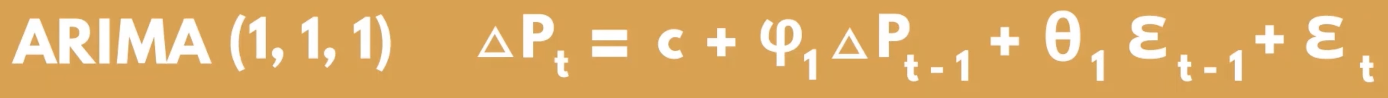
An ARIMA(p,d,q) is simply and ARMA(p,q) model for a newly generated time-series which is stationary. Of couse the stationary will need 1,2 or more integration. A second integration would use the time series that consists of the differences in the prices and would calculate their differences.

We said that the ARMA doesn't have any ACF or PACF which suggest what the optimal order for the different component is, and we can say the same for ARIMA, so our best bet is to start simple. Examine the ACF of the Residual values and get a better feel which lag to use. It's important to know that we lose one or several observation when we deal with integrated values, just like the returns it is unavoidable. The issue comes from the fact thet there's no previous period where we whish to integrate the first period.
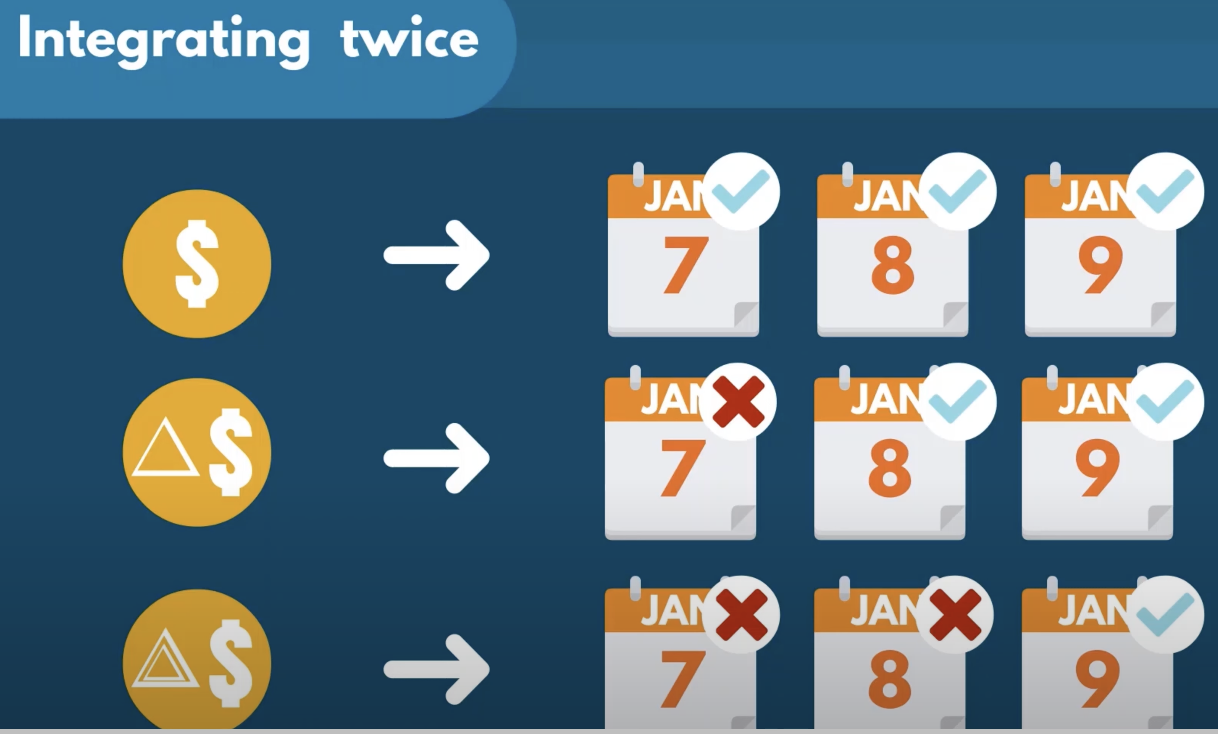
Simply put, for any integration we lose a single observation. So we should be aware of this when making our analysis. This is important because having empty values prevents the ACF method from compiling.

## Importing the relevant packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [41]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [8]:
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [31]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Tue, 13 Feb 2024   AIC                          55214.010
Time:                        10:56:03   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.654      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.925      0.000      -0.896      -0.688
sigma2      3498.7412     40.932     85.477      0.000    3418.516    3578.967
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              3326.23
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals of the ARIMA(1,1,1)

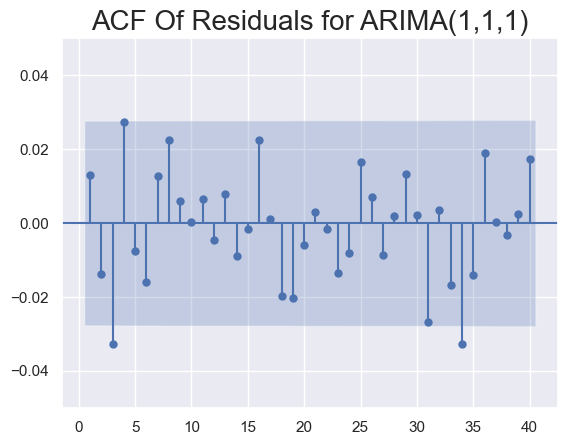

In [32]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.ylim(-0.05,0.05)
plt.show()

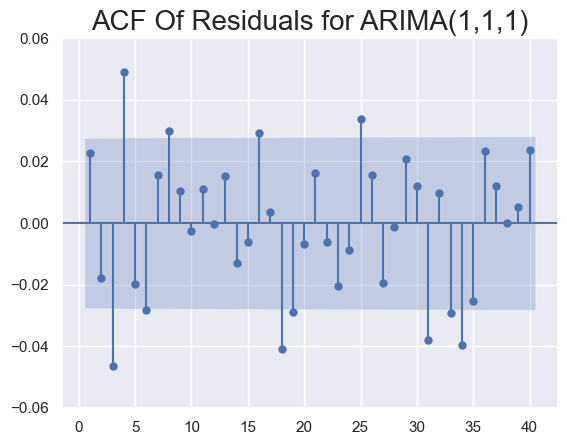

In [37]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.ylim(-0.06,0.06)
plt.show()

## Higher-Lag ARIMA Models

In [38]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [39]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -27604.00510530288 	 AIC =  55214.01021060576
ARIMA(1,1,2):  	 LL =  -27600.40763254303 	 AIC =  55208.81526508606
ARIMA(1,1,3):  	 LL =  -27590.723481948233 	 AIC =  55191.446963896466
ARIMA(2,1,1):  	 LL =  -27600.13055105199 	 AIC =  55208.26110210398
ARIMA(3,1,1):  	 LL =  -27592.336116473503 	 AIC =  55194.67223294701
ARIMA(3,1,2):  	 LL =  -27590.920318077806 	 AIC =  55193.84063615561


In [42]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)))


LLR test p-value = 0.0


In [43]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF = 2)))


LLR test p-value = 0.0


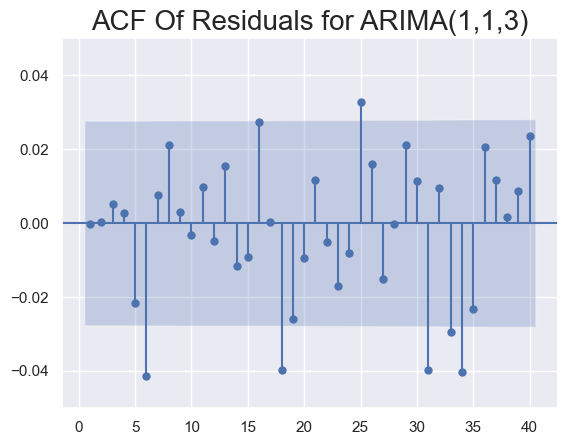

In [46]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.ylim(-0.05,0.05)
plt.show()

In [47]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()

In [48]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.845
Date:                Tue, 13 Feb 2024   AIC                          55187.689
Time:                        11:05:28   BIC                          55233.338
Sample:                    01-07-1994   HQIC                         55203.685
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.153      2.618      0.009       0.101       0.701
ar.L2         -0.0444      0.011     -4.071      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.226      0.000      -0.079      -0.029
ar.L4          0.0587      0.015      3.914      0.000       0.029       0.088
ar.L5         -0.0580      0.009     -6.337      0.000      -0.076      -0.040
ma.L1         -0.4208      0.153     -2.743      0.006      -0.721      -0.120
sigma2      3479.0027     41.909     83.013      0.000    3396.862    3561.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3060.40
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3):  	 LL =  -27590.723481948233 	 AIC =  55191.446963896466
ARIMA(5,1,1):  	 LL =  -27586.844609589352 	 AIC =  55187.689219178705
ARIMA(6,1,3):  	 LL =  -27583.85849981143 	 AIC =  55187.71699962286


In [50]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_3, model_ar_6_i_1_ma_3, DF = 5)))


LLR test p-value = 0.017


In [51]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_5_i_1_ma_1, model_ar_6_i_1_ma_3, DF = 3)))


LLR test p-value = 0.113


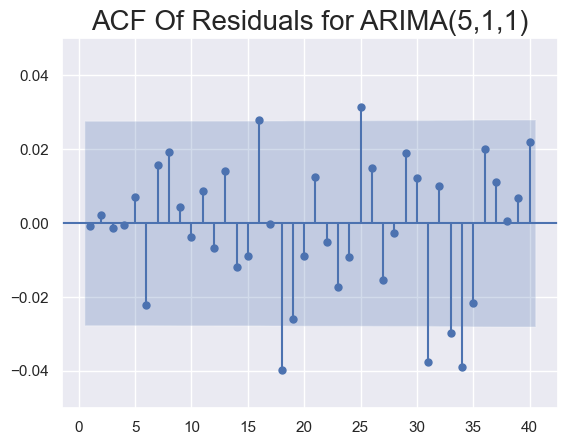

In [53]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.ylim(-0.05,0.05)
plt.show()

## Models with Higher Levels of Integration
Up until now, we understood that we only rely on integration when our time series comes from a non-stationary process. Then, if a single level of integration d=1 accomplishes this, any additional ones are unnecessary. But how do we know if the dataset is stationary?
1) We manually create an integrated version of the time-series and use the Dickey Fuller test

In [54]:
df['delta_prices'] = df.market_value.diff(1)

In [55]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Tue, 13 Feb 2024   AIC                          55215.333
Time:                        17:21:28   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6352     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3327.38
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
sts.adfuller(df.delta_prices[1:])

(-32.24409349570757,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

The Dickey Fuller test tells us that the data is stationary, this tells us that there's no need for addition levels of integration.

In [57]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -27614.177
Date:                Tue, 13 Feb 2024   AIC                          55234.353
Time:                        17:27:21   BIC                          55253.916
Sample:                    01-07-1994   HQIC                         55241.208
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0178      0.010     -1.807      0.071      -0.037       0.002
ma.L1         -1.0000      0.012    -84.750      0.000      -1.023      -0.977
sigma2      3513.2222     56.470     62.214      0.000    3402.544    3623.901
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3335.05
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

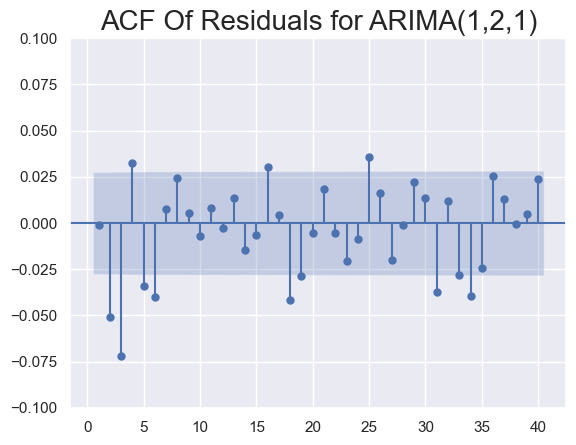

In [61]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.ylim(-0.1,0.1)
plt.show()

# NEXT STEPS: 
At this point it would be cool to discuss why we used ARMA on non-stationary data, but didn't use ARIMA on stationary data (like returns), several problems why differencing and computational power ecc... Next, most of the times several factors play a role on the price of an index, like the country's inflation rate, the gas price ecc.. The way we'll take these into account is by using the **"MAX"** models: ARIMAX model or the ARMAX model.

The equation for the ARIMAX model would look like this: 

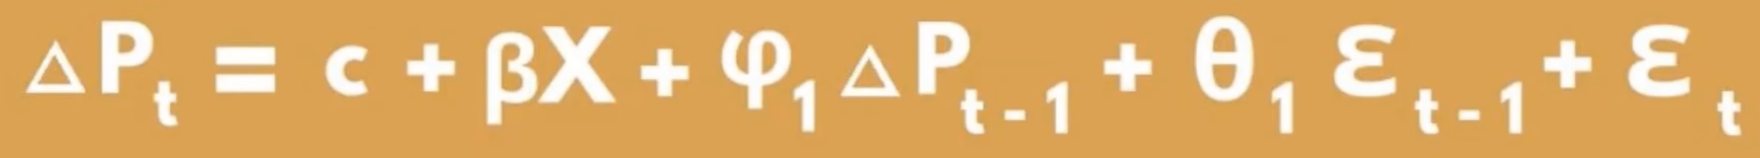

Of course, if we were to use the ARMAX model, we would use the actual variable P instead of its Delta. The only new value in the model are B and X, B is a value which will be fitted based on the model selection and the data. X is just another variable we're interested in, it can be any kind of variable or variables that can affect prices as long as we have the data available for wvery periods. Such outside factors are known as exogenous variables. We use these ones in our regression to explain and predict the ones we're interested in, which happen to be current prices in our case. Conveniently enough, the ARIMA functions we've been using till now, is capable of handling such variables. After we specify the time-series, we speciry the **exog = array_type** with values associated for wvery period, like for instance the S%P500 prices.

## ARIMAX

In [67]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.392
Date:                Tue, 13 Feb 2024   AIC                          53394.784
Time:                        17:59:20   BIC                          53420.869
Sample:                    01-07-1994   HQIC                         53403.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6928      0.035     76.407      0.000       2.624       2.762
ar.L1          0.2571      0.029      8.812      0.000       0.200       0.314
ma.L1         -0.5460      0.025    -21.791      0.000      -0.595      -0.497
sigma2      2433.0771     27.350     88.961      0.000    2379.472    2486.682
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4423.90
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMAX

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [73]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61406D+00    |proj g|=  3.31141D-01

At iterate    5    f=  5.36916D+00    |proj g|=  4.07136D-02

At iterate   10    f=  5.33449D+00    |proj g|=  8.82022D-03

At iterate   15    f=  5.32970D+00    |proj g|=  4.86568D-02

At iterate   20    f=  5.32286D+00    |proj g|=  8.95461D-04

At iterate   25    f=  5.32277D+00    |proj g|=  3.51643D-03

At iterate   30    f=  5.32138D+00    |proj g|=  6.75771D-03

At iterate   35    f=  5.32051D+00    |proj g|=  8.20623D-03

At iterate   40    f=  5.32023D+00    |proj g|=  3.41558D-03

At iterate   45    f=  5.32019D+00    |proj g|=  9.79937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.675
Date:                           Tue, 13 Feb 2024   AIC                          53439.350
Time:                                   18:16:18   BIC                          53485.000
Sample:                               01-07-1994   HQIC                         53455.347
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7086      0.035     77.053      0.000       2.640       2.777
ar.L1          0.9998      0.000   2206.821      0.000       0.999       1.001
ma.L1         -0.3119      0.010    -32.741      0.000      -0.331      -0.293
ar.S.L5        0.9653      0.011     87.854      0.000       0.944       0.987
ar.S.L10       0.0343      0.010      3.391      0.001       0.014       0.054
ma.S.L5       -0.9987      0.006   -173.133      0.000      -1.010      -0.987
sigma2      2446.8386     28.572     85.636      0.000    2390.838    2502.840
===================================================================================
Ljung-Box (L1) (Q):                   1.84   Jarque-Bera (JB):              4204.16
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""